---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5)

1

In [3]:
np.random.binomial(1000, 0.5)/1000

0.492

In [4]:
x = np.random.binomial(20, .5, 10000)
print((x>=15).mean())

0.0199


In [5]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

11

In [7]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
len(tornado_events)

1000000

In [8]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

90 tornadoes back to back in 2739.72602739726 years


In [11]:
np.random.uniform(0, 1)

0.8386484878943203

In [13]:
np.random.normal(0.75)

1.7946394408633801

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [36]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.94728782740498307

In [37]:
np.std(distribution)

0.94728782740498307

In [17]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.0657313139631932

In [18]:
stats.skew(distribution)

0.04695292229018575

In [19]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9903793511144043

In [20]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.265808456315334

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


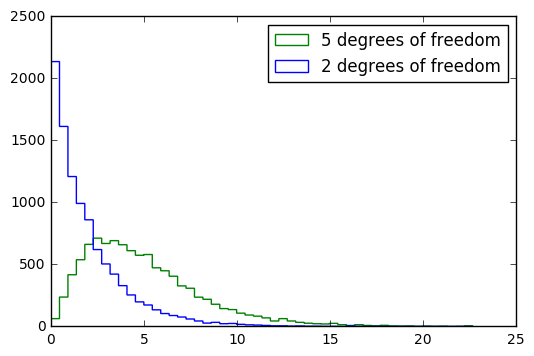

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [22]:
df = pd.read_csv('grades.csv')

In [23]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [24]:
len(df)

2315

In [25]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [26]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [27]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [30]:
from scipy import stats
stats.ttest_ind?

In [31]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [32]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [33]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [3]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
    universityTowns = []
    statesAndRegions = []
    state = None
    with open('university_towns.txt') as file:
        for line in file:
            current = line[:-1]
            if current[-6:] == '[edit]':
                state = current[:-6]
                continue
            if '(' in line:
                region = current[:current.index('(')-1]
                statesAndRegions.append([state,region])
            else:
                region = current
                statesAndRegions.append([state,region])
            universityTowns.append(current)
    res = pd.DataFrame(statesAndRegions,columns = ['State','RegionName'])
    return res

get_list_of_university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [39]:
with open('university_towns.txt') as file:
    for line in file:
        print(line[:-1])

Alabama[edit]
Auburn (Auburn University)[1]
Florence (University of North Alabama)
Jacksonville (Jacksonville State University)[2]
Livingston (University of West Alabama)[2]
Montevallo (University of Montevallo)[2]
Troy (Troy University)[2]
Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]
Tuskegee (Tuskegee University)[5]
Alaska[edit]
Fairbanks (University of Alaska Fairbanks)[2]
Arizona[edit]
Flagstaff (Northern Arizona University)[6]
Tempe (Arizona State University)
Tucson (University of Arizona)
Arkansas[edit]
Arkadelphia (Henderson State University, Ouachita Baptist University)[2]
Conway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]
Fayetteville (University of Arkansas)[7]
Jonesboro (Arkansas State University)[8]
Magnolia (Southern Arkansas University)[2]
Monticello (University of Arkansas at Monticello)[2]
Russellville (Arkansas Tech University)[2]
Searcy (Harding University)[5]
California[edit]
Angwin (Pacific Union College

In [63]:
res = pd.read_csv('City_Zhvi_AllHomes.csv')
res.head()
select_columns = list(res.loc[:, res.columns.str.startswith('20')].columns.values)
columns_to_use = ['RegionID', 'RegionName', 'State', 'Metro', 'CountyName']
columns_to_use = columns_to_use + select_columns
res[columns_to_use]

,RegionID,RegionName,State,Metro,CountyName,2000-01,2000-02,2000-03,2000-04,2000-05,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,204400.0,207000.0,209800.0,212300.0,214500.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,136800.0,138300.0,140100.0,141900.0,143700.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,52700.0,53100.0,53200.0,53400.0,53700.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,111000.0,111700.0,112800.0,113700.0,114300.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
5,18959,Las Vegas,NV,Las Vegas,Clark,131700.0,132600.0,133500.0,134100.0,134400.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
6,54296,San Diego,CA,San Diego,San Diego,219200.0,222900.0,226600.0,230200.0,234400.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,85100.0,84500.0,83800.0,83600.0,83800.0,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
8,33839,San Jose,CA,San Jose,Santa Clara,364100.0,374000.0,384700.0,395700.0,407100.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700
9,25290,Jacksonville,FL,Jacksonville,Duval,88000.0,88800.0,89000.0,88900.0,89600.0,...,132000,132500,133100,133900,134900,136000,137200,138400,139500,140300


In [64]:
res = pd.read_excel('gdplev.xls')
res.head()

,"Current-Dollar and ""Real"" Gross Domestic Product",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,2016-09-29 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annual,NaN,NaN,NaN,Quarterly,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,(Seasonally adjusted annual rates),NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN


In [76]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    res = pd.ExcelFile('gdplev.xls')
    res = res.parse("Sheet1", skiprows=219)
    res = res[['1999q4', 9926.1]]
    for i in range(2, len(res)):
        if (res.iloc[i-2][1] > res.iloc[i-1][1]) and (res.iloc[i-1][1] > res.iloc[i][1]):
            return res.iloc[i-2][0]
        
get_recession_start()

'2008q3'

In [79]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    gdplev = pd.ExcelFile('gdplev.xls')
    gdplev = gdplev.parse("Sheet1", skiprows=219)
    gdplev = gdplev[['1999q4', 9926.1]]
    gdplev.columns = ['Quarter','GDP']
    start = get_recession_start()
    start_index = gdplev[gdplev['Quarter'] == start].index.tolist()[0]
    gdplev=gdplev.iloc[start_index:]
    for i in range(2, len(gdplev)):
        if (gdplev.iloc[i-2][1] < gdplev.iloc[i-1][1]) and (gdplev.iloc[i-1][1] < gdplev.iloc[i][1]):
            return gdplev.iloc[i][0]

get_recession_end()

'2009q4'

In [78]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    res = pd.ExcelFile('gdplev.xls')
    res = res.parse("Sheet1", skiprows=219)
    res = res[['1999q4', 9926.1]]
    start = get_recession_start()
    startIndex = res[res['1999q4'] == start].index.tolist()[0]
    res=res.iloc[startIndex:]
    for i in range(2, len(res)):
        if (res.iloc[i-2][1] < res.iloc[i-1][1]) and (res.iloc[i-1][1] < res.iloc[i][1]):
            return res.iloc[i][0]
        
get_recession_end()        

'2009q4'

In [75]:
gdplev = pd.ExcelFile('gdplev.xls')
gdplev = gdplev.parse("Sheet1", skiprows=219)
gdplev = gdplev[['1999q4', 9926.1]]
gdplev.head()

,1999q4,9926.1
0,2000q1,10031.0
1,2000q2,10278.3
2,2000q3,10357.4
3,2000q4,10472.3
4,2001q1,10508.1


In [81]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    res = pd.ExcelFile('gdplev.xls')
    res = res.parse("Sheet1", skiprows=219)
    res = res[['1999q4', 9926.1]]
    res.columns = ['Quarter','GDP']
    start = get_recession_start()
    startIndex = res[res['Quarter'] == start].index.tolist()[0]
    end = get_recession_end()
    endIndex = res[res['Quarter'] == end].index.tolist()[0]
    res = res.iloc[startIndex:endIndex+1]
    bottom = res['GDP'].min()
    bottomIndex = res[res['GDP'] == bottom].index.tolist()[0] - startIndex
    return res.iloc[bottomIndex]['Quarter']

get_recession_bottom()

'2009q2'

In [21]:
housingData = pd.read_csv('City_Zhvi_AllHomes.csv')
housingData.drop(['Metro','CountyName','RegionID','SizeRank'],axis=1,inplace=1)
housingData['State'] = housingData['State'].map(states)
housingData.set_index(['State','RegionName'],inplace=True)
columns = list(housingData.columns)
columns
columns = columns[0:45]
len(columns)
housingData.drop(columns,axis=1,inplace=1)
housingData.head()
qs = [list(housingData.columns)[x:x+3] for x in range(0, len(list(housingData.columns)), 3)]
qs

[['2000-01', '2000-02', '2000-03'],
 ['2000-04', '2000-05', '2000-06'],
 ['2000-07', '2000-08', '2000-09'],
 ['2000-10', '2000-11', '2000-12'],
 ['2001-01', '2001-02', '2001-03'],
 ['2001-04', '2001-05', '2001-06'],
 ['2001-07', '2001-08', '2001-09'],
 ['2001-10', '2001-11', '2001-12'],
 ['2002-01', '2002-02', '2002-03'],
 ['2002-04', '2002-05', '2002-06'],
 ['2002-07', '2002-08', '2002-09'],
 ['2002-10', '2002-11', '2002-12'],
 ['2003-01', '2003-02', '2003-03'],
 ['2003-04', '2003-05', '2003-06'],
 ['2003-07', '2003-08', '2003-09'],
 ['2003-10', '2003-11', '2003-12'],
 ['2004-01', '2004-02', '2004-03'],
 ['2004-04', '2004-05', '2004-06'],
 ['2004-07', '2004-08', '2004-09'],
 ['2004-10', '2004-11', '2004-12'],
 ['2005-01', '2005-02', '2005-03'],
 ['2005-04', '2005-05', '2005-06'],
 ['2005-07', '2005-08', '2005-09'],
 ['2005-10', '2005-11', '2005-12'],
 ['2006-01', '2006-02', '2006-03'],
 ['2006-04', '2006-05', '2006-06'],
 ['2006-07', '2006-08', '2006-09'],
 ['2006-10', '2006-11', '200

In [23]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    housingData = pd.read_csv('City_Zhvi_AllHomes.csv')
    housingData.drop(['Metro','CountyName','RegionID','SizeRank'],axis=1,inplace=1)
    housingData['State'] = housingData['State'].map(states)
    housingData.set_index(['State','RegionName'],inplace=True)
    columns = list(housingData.columns)
    columns = columns[0:45]
    housingData.drop(columns,axis=1,inplace=1)
    
    years = list(range(2000,2017))
    qs = ['q1','q2','q3','q4']
    qs_years = []
    for i in years:
        for x in qs:
            qs_years.append((str(i)+x))
            
    columnNames = qs_years[:67]
    quarters = [list(housingData.columns)[x:x+3] for x in range(0, len(list(housingData.columns)), 3)]
        
    for col,q in zip(columnNames, quarters):
        housingData[col] = housingData[q].mean(axis=1)
        
    housingData = housingData[columnNames]
    return housingData

convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [25]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) 
    where 
    
    different=True if the t-test is True at a p<0.01 (we reject the null hypothesis), 
    different=False if otherwise (we cannot reject the null hypothesis). 
    
    The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    housingData = convert_housing_data_to_quarters().copy()
    housingData = housingData.loc[:,'2008q3':'2009q2']
    housingData = housingData.reset_index()
    
    def price_ratio(row):
        return (row['2008q3'] - row['2009q2'])/row['2008q3']
    
    housingData['up&down'] = housingData.apply(price_ratio, axis=1)
    
    universityTowns = get_list_of_university_towns()['RegionName']
    universityTowns = set(universityTowns)

    def is_university_town(row):
        #check if the town is a university towns or not.
        if row['RegionName'] in universityTowns:
            return 1
        else:
            return 0
    
    housingData['is_university_town'] = housingData.apply(is_uni_town, axis=1)
    
    
    notUniversity = housingData[housingData['is_university_town']==0].loc[:,'up&down'].dropna()
    isUniversity  = housingData[housingData['is_university_town']==1].loc[:,'up&down'].dropna()
    
    def better():
        if notUniversity.mean() < isUniversity.mean():
            return 'non-university town'
        else:
            return 'university town'
        
    p_val = list(ttest_ind(notUniversity, isUniversity))[1]
    result = (True,p_val,better())
    return result

run_ttest()

(True, 0.00036641601595526971, 'university town')